In [68]:
#Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# preprocessing libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline 
# machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV # for hyperparameter tuning
#import optuna as optuna # for hyperparameter tuning
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
# regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
# tree-based algorithms
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

#import shape # for model interpretability
import sys
sys.path.append('../../src')
#from EvaluateRegression import evaluate_regression
import shap

In [69]:
df = pd.read_csv('../data/df_cleaned.csv',sep=";")

In [70]:
# Define features and target
target = "prix_m2_vente"
X = df.drop(columns=[target])
y = df[target]

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39439 entries, 0 to 39438
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               39439 non-null  int64  
 1   type_annonceur           39439 non-null  object 
 2   typedebien               39439 non-null  object 
 3   typedetransaction        39439 non-null  object 
 4   etage                    39439 non-null  int64  
 5   surface                  39439 non-null  int64  
 6   nb_pieces                39439 non-null  int64  
 7   prix_bien                39439 non-null  int64  
 8   mensualiteFinance        39439 non-null  int64  
 9   balcon                   39439 non-null  int64  
 10  eau                      39439 non-null  int64  
 11  bain                     39439 non-null  int64  
 12  dpeL                     39439 non-null  object 
 13  dpeC                     39439 non-null  float64
 14  mapCoordonneesLatitude

In [86]:
df = df.drop('Unnamed: 0',axis=1)

In [72]:
df.head()

,Unnamed: 0,type_annonceur,typedebien,typedetransaction,etage,surface,nb_pieces,prix_bien,mensualiteFinance,balcon,...,IRIS,CODE_IRIS,TYP_IRIS_x,TYP_IRIS_y,GRD_QUART,UU2010,REG,DEP,type_transaction,prix_m2_vente
0,0,pr,m,l,0,116,5,1250,0,0,...,0,681590000,Z,Z,6815900,68000,44,68,location,10.775862
1,1,pr,a,l,3,44,3,600,0,0,...,1201,682241201,H,H,6822401,68701,44,68,location,13.636364
2,2,pr,a,l,1,53,2,498,0,1,...,1201,682241201,H,H,6822401,68701,44,68,location,9.396226
3,3,pr,a,l,0,41,2,460,0,0,...,1201,682241201,H,H,6822401,68701,44,68,location,11.219512
4,4,pr,a,l,2,74,4,695,0,0,...,1201,682241201,H,H,6822401,68701,44,68,location,9.391892


In [73]:
# Identify numeric and categorical columns
var_num = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
var_cat = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [74]:
var_num

['Unnamed: 0',
 'etage',
 'surface',
 'nb_pieces',
 'prix_bien',
 'mensualiteFinance',
 'balcon',
 'eau',
 'bain',
 'dpeC',
 'mapCoordonneesLatitude',
 'mapCoordonneesLongitude',
 'duree_int',
 'INSEE_COM',
 'IRIS',
 'CODE_IRIS',
 'GRD_QUART',
 'UU2010',
 'REG',
 'DEP']

In [75]:
var_cat

['type_annonceur',
 'typedebien',
 'typedetransaction',
 'dpeL',
 'annonce_exclusive',
 'exposition',
 'ges_class',
 'categorie_annonceur',
 'logement_neuf',
 'typedebien_lite',
 'TYP_IRIS_x',
 'TYP_IRIS_y',
 'type_transaction']

In [76]:
# Preprocessing
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), var_num),
    ("cat", OneHotEncoder(handle_unknown="ignore"), var_cat)
])

In [77]:

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Evaluation function
def evaluate_regression(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"RMSE: {rmse:.4f}, R2: {r2:.4f}")

---
Train Model
---

In [78]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
# ===========================
# Linear Regression Model
# ===========================
lin_reg = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

print("=== Linear Regression ===")
evaluate_regression(y_test, y_pred_lr)


# ===========================
# Ridge Regression Model
# ===========================
ridge = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', Ridge(alpha=1.0))
])

ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("\n=== Ridge Regression ===")
evaluate_regression(y_test, y_pred_ridge)


# ===========================
# Lasso Regression Model
# ===========================
lasso = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', Lasso(alpha=0.01))
])

lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("\n=== Lasso Regression ===")
evaluate_regression(y_test, y_pred_lasso)


# ===========================
# Random Forest Regressor
# ===========================
rf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=300,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    ))
])

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest Regressor ===")
evaluate_regression(y_test, y_pred_rf)


# ===========================
# XGBoost Regressor
# ===========================
xgb = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    ))
])

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\n=== XGBoost Regressor ===")
evaluate_regression(y_test, y_pred_xgb)

# ===========================
# CATBoost Regressor
# ===========================

cat = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', CatBoostRegressor(
        iterations=300,
        learning_rate=0.05,
        depth=5,
        loss_function='RMSE',
        random_seed=42,
        thread_count=-1,
        verbose=0
    ))
])

cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)

print("\n=== CatBoost Regressor ===")
evaluate_regression(y_test, y_pred_cat)

=== Linear Regression ===
RMSE: 489.7903, R2: 0.8890

=== Ridge Regression ===
RMSE: 486.0242, R2: 0.8907


c:\Users\CYTech Student\anaconda3\envs\mon_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.884e+09, tolerance: 7.878e+06
  model = cd_fast.sparse_enet_coordinate_descent(



=== Lasso Regression ===
RMSE: 486.0547, R2: 0.8907

=== Random Forest Regressor ===
RMSE: 103.9365, R2: 0.9950

=== XGBoost Regressor ===
RMSE: 107.9050, R2: 0.9946

=== CatBoost Regressor ===
RMSE: 142.7471, R2: 0.9906


In [80]:
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np

def evaluate_with_cross_val(models_dict, X, y, cv=5):
    """
    Effectue une validation croisée pour une liste de modèles et affiche les scores.
    
    Args:
        models_dict (dict): Dictionnaire de noms de modèles et leurs pipelines respectifs.
        X: Features (données d'entraînement).
        y: Target (variable cible).
        cv (int): Nombre de plis (folds) pour la validation croisée.
    """
    results = []
    
    print(f"=== Validation Croisée (K={cv}) ===")
    
    # Définition des métriques à calculer
    scoring = {
        'rmse': 'neg_root_mean_squared_error',
        'mae': 'neg_mean_absolute_error',
        'r2': 'r2'
    }

    for name, model in models_dict.items():
        # Exécution de la validation croisée
        cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
        
        # Extraction des scores (on inverse le signe pour RMSE et MAE car sklearn les renvoie en négatif)
        mean_rmse = -cv_results['test_rmse'].mean()
        std_rmse = cv_results['test_rmse'].std()
        mean_mae = -cv_results['test_mae'].mean()
        mean_r2 = cv_results['test_r2'].mean()
        
        results.append({
            'Modèle': name,
            'RMSE Moyenne': mean_rmse,
            'RMSE Std': std_rmse,
            'MAE Moyenne': mean_mae,
            'R² Moyen': mean_r2
        })
        
        print(f"Terminé pour : {name}")

    # Transformation en DataFrame pour une lecture facile
    df_results = pd.DataFrame(results).sort_values(by='RMSE Moyenne')
    return df_results

# ==========================================
# 1. Regrouper vos modèles dans un dictionnaire
# ==========================================
mes_modeles = {
    "Linear Regression": lin_reg,
    "Ridge": ridge,
    "Lasso": lasso,
    "Random Forest": rf,
    "XGBoost": xgb,
    "CatBoost": cat
}

# ==========================================
# 2. Lancer l'évaluation
# ==========================================
# Utiliser X_train et y_train (ou le dataset complet X, y pour une estimation finale)
resultats_finaux = evaluate_with_cross_val(mes_modeles, X_train, y_train, cv=5)

print("\n=== Classement des modèles ===")
print(resultats_finaux)

=== Validation Croisée (K=5) ===
Terminé pour : Linear Regression
Terminé pour : Ridge
Terminé pour : Lasso
Terminé pour : Random Forest
Terminé pour : XGBoost
Terminé pour : CatBoost

=== Classement des modèles ===
              Modèle  RMSE Moyenne    RMSE Std  MAE Moyenne  R² Moyen
3      Random Forest    294.180660  209.739010    47.031629  0.954380
5           CatBoost    359.750591  185.595384    82.648125  0.940356
4            XGBoost    362.970422  195.296806    51.909854  0.938704
1              Ridge    715.961638  200.642855   335.184973  0.790855
0  Linear Regression    726.107046  192.072391   335.441477  0.785517
2              Lasso    733.612533  186.864164   335.542206  0.781256


In [81]:
# Feature Importance  for Random Forest with xgb feature importance
rf_model = rf.named_steps['model']
importances = rf_model.feature_importances_
feature_names = rf.named_steps['preprocess'].get_feature_names_out()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance_df

,Feature,Importance
4,num__prix_bien,0.758820
2,num__surface,0.221255
3,num__nb_pieces,0.014724
10,num__mapCoordonneesLatitude,0.000947
11,num__mapCoordonneesLongitude,0.000737
...,...,...
67,cat__exposition_Traversant-Est-Ouest,0.000000
68,cat__exposition_nord ouest,0.000000
69,"cat__exposition_nord,est",0.000000
80,cat__exposition_traversant nord-sud,0.000000


Total features after preprocessing: 111


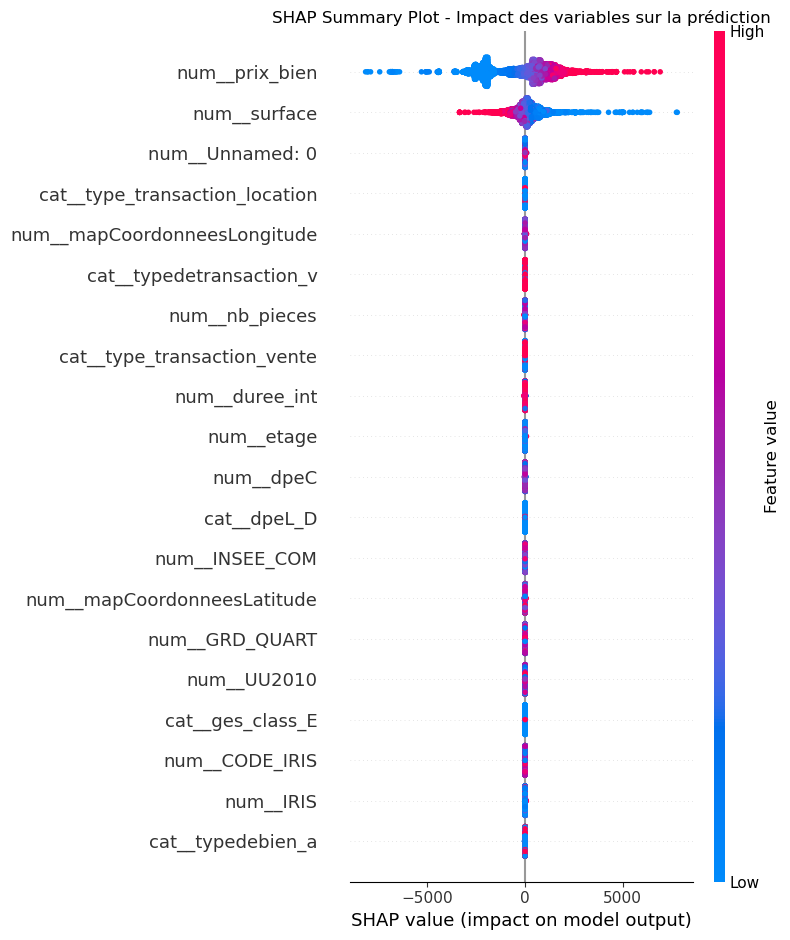

In [85]:
# 1. Extraire le préprocesseur et le modèle
preprocessor_rf = rf.named_steps['preprocess']
rf_model = rf.named_steps['model']

# 2. Prétraiter les données
X_test_preprocessed = preprocessor_rf.transform(X_test)

# Gestion des matrices creuses et du type de données
if hasattr(X_test_preprocessed, "toarray"):
    X_test_preprocessed = X_test_preprocessed.toarray()
X_test_preprocessed = X_test_preprocessed.astype(np.float64)

# 3. Récupérer les noms des colonnes de manière robuste
# Cette méthode évite les erreurs si l'ordre des transformers change
feature_names = preprocessor_rf.get_feature_names_out()

print(f"Total features after preprocessing: {len(feature_names)}")

# 4. Calculer les valeurs SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_preprocessed)

# Note : Pour Random Forest, shap_values peut être une liste [class0, class1] 
# ou une matrice simple pour la régression. On s'assure d'avoir la bonne dimension.
if isinstance(shap_values, list) and len(shap_values) > 1:
    shap_values_to_plot = shap_values[1] # Souvent l'index 1 pour la classe positive
else:
    shap_values_to_plot = shap_values

# 5. Affichage (Summary Plot)

plt.figure(figsize=(12, 6))
# On passe feature_names ici pour que l'axe Y affiche les vrais noms au lieu de "Column 0"
shap.summary_plot(shap_values_to_plot, X_test_preprocessed, feature_names=feature_names, show=False)
plt.title("SHAP Summary Plot - Impact des variables sur la prédiction")
plt.tight_layout()
plt.show()